# 2020年8月29日

### 118 杨辉三角
给定一个非负整数 numRows，生成杨辉三角的前 numRows 行。

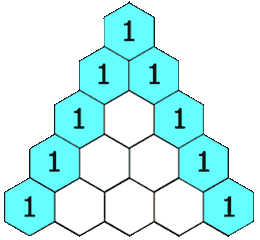

在杨辉三角中，每个数是它左上方和右上方的数的和。

示例:

输入: 5
输出:
[
     [1],
    [1,1],
   [1,2,1],
  [1,3,3,1],
 [1,4,6,4,1]
]

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/pascals-triangle
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
首先观察到每一行的开头和结尾数字都是1，第i行就有i个数。
第i行的第j个数等于第i-1行的第j-1和j两个数相加，因此可以写出答案。

In [ ]:
class Solution {
public:
    vector<vector<int>> generate(int numRows) {
        vector<vector<int>> anser;
        if(numRows == 0) return anser;
        vector<int> row1;
        row1.push_back(1);
        anser.push_back(row1); 
        for(int i = 1; i < numRows; ++i){
            vector<int> rowi;
            rowi.push_back(1);
            for(int j = 1; j < i; ++j)
                rowi.push_back(anser[i - 1][j - 1] + anser[i - 1][j]);
            rowi.push_back(1);
            anser.push_back(rowi);
        }
        return anser;
    }
};

### 119 杨辉三角2
给定一个非负索引 k，其中 k ≤ 33，返回杨辉三角的第 k 行。

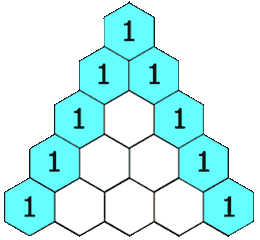

在杨辉三角中，每个数是它左上方和右上方的数的和。

示例:

输入: 3
输出: [1,3,3,1]
进阶：

你可以优化你的算法到 O(k) 空间复杂度吗？

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/pascals-triangle-ii
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
杨辉三角是二项式系数在三角形中的一种排列。第i行即为$(1 + x)^i$展开后x的系数。

第i行第m个数为$C(i, m-1) =\frac{i!}{(m-1)!(i-m+1)!} $

第i行第m+1个数为$C(i, m) =\frac{i!}{m!(i-m)!} = C(i, m-1)\frac{ (i-m+1)}{m}$

In [ ]:
class Solution {
public:
    vector<int> getRow(int rowIndex) {
        vector<int> row;
        if (rowIndex < 0) return row;
        row.push_back(1);
        for(int i = 1; i < rowIndex + 1; ++i){
            row.push_back(static_cast<int>((double)row[i - 1] * (rowIndex - i + 1) / i ));
        }
        return row;
    }
};

需要注意的是，第8行如果不先转换为double可能会产生溢出

### 121 买卖股票的最佳时机
给定一个数组，它的第 i 个元素是一支给定股票第 i 天的价格。

如果你最多只允许完成一笔交易（即买入和卖出一支股票一次），设计一个算法来计算你所能获取的最大利润。

注意：你不能在买入股票前卖出股票。

 

示例 1:

输入: [7,1,5,3,6,4]
输出: 5
解释: 在第 2 天（股票价格 = 1）的时候买入，在第 5 天（股票价格 = 6）的时候卖出，最大利润 = 6-1 = 5 。
     注意利润不能是 7-1 = 6, 因为卖出价格需要大于买入价格；同时，你不能在买入前卖出股票。
示例 2:

输入: [7,6,4,3,1]
输出: 0
解释: 在这种情况下, 没有交易完成, 所以最大利润为 0。

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/best-time-to-buy-and-sell-stock
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
用$f(i)$表示第$i$天卖出股票的最大收益，假设数组中共有n个元素，那么我们的目标转为:
$max_{0<=i<n-1}f(i)$

现在问题是怎么求得$f(i)$?我们buy[j]表示j天买入，sale[i]表示第i天卖出。那么$f(i) = sale[i] - buy[j]$，显而易见的是最小的buy[j]使$f(i)$最大。

In [ ]:
class Solution {
public:
    int maxProfit(vector<int>& prices) {
        if(prices.empty()) return 0;
        int max_payoff = 0;
        for(int i = 0; i < prices.size(); ++i){
            int min_buy = INT_MAX;
            int payoff = 0;
            for(int j = 0; j < i; ++j){
                if(prices[j] < min_buy) min_buy = prices[j];
            }
            if(prices[i] - min_buy > 0) payoff = prices[i] - min_buy;
            max_payoff = max(max_payoff, payoff);
        }
        return max_payoff;
    }
};

这里每次都去前面的子数组中寻找最小值，实际上并不需要这样，也就是说，如果prices[i]之前的数组的最小值是min即$argmin \{ prices[0],...,prices[i-1]\} = min$,那么包括prices[i]的最小值是$min(prices[i], min)$

In [ ]:
class Solution {
public:
    int maxProfit(vector<int>& prices) {
        if(prices.empty()) return 0;
        int max_payoff = 0;
        int min_buy = prices[0];
        int payoff = 0;
        for(int i = 1; i < prices.size(); ++i){
            payoff = prices[i] - min_buy;
            min_buy = prices[i] < min_buy ? prices[i] : min_buy;
            max_payoff = payoff > max_payoff ? payoff : max_payoff;
        }
        return max_payoff;
    }
};

一个小经验是min_buy = prices[i] < min_buy ? prices[i] : min_buy;这个表达式比if(prices[j] < min_buy) min_buy = prices[j];更快